In [2]:
1+2

3

In [1]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


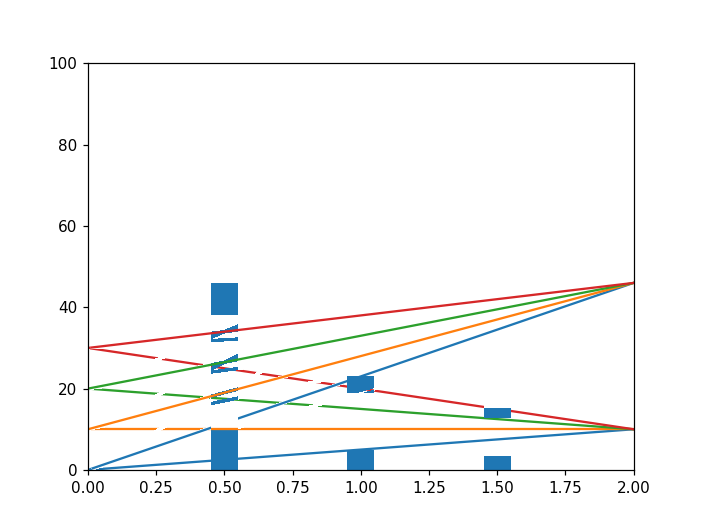

In [13]:
# import matplotlib
# matplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend

# import matplotlib.pyplot as plt

# from matplotlib import animation

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(0, 100))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

rectangles = plt.bar([0.5,1,1.5],[50,40,90],width=0.1) #rectangles to animate

patches = lines + list(rectangles) #things to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    #init rectangles
    for rectangle in rectangles:
        rectangle.set_height(0)

    return patches #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data([0, 2], [10 * j,i])

    #animate rectangles
    for j,rectangle in enumerate(rectangles):
        rectangle.set_height(i/(j+1))

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
# anim.save("test.mp4")

plt.show()

Testing Animation

In [11]:
# Enable interactive plot
%matplotlib notebook

In [7]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

In [9]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

<IPython.core.display.Javascript object>


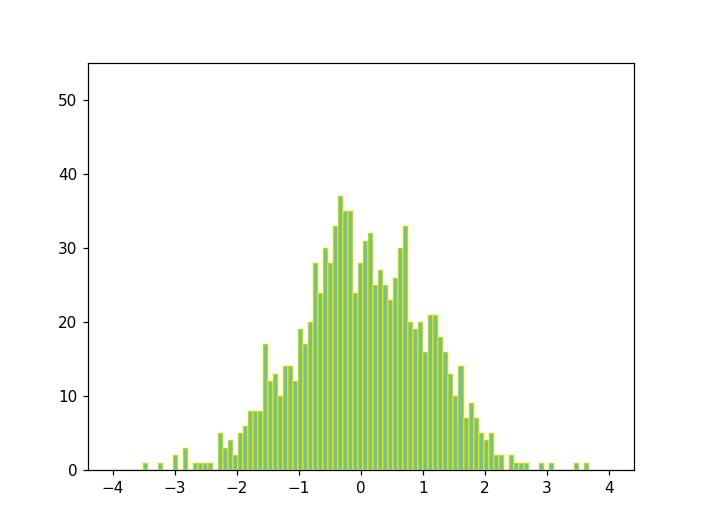

In [12]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()